In [10]:
##Caricamento del Dataset ed esplorazione preliminare
#

import pandas as pd

# Carica i dataset dal repository di Github nei DataFrame
url_train = 'https://raw.githubusercontent.com/francescovissicchio/infrastructure_project_UMG/main/Corona_NLP_train.csv'
url_test = 'https://raw.githubusercontent.com/francescovissicchio/infrastructure_project_UMG/main/Corona_NLP_test.csv'
df_train = pd.read_csv(url_train, encoding='ISO-8859-1')
df_test = pd.read_csv(url_test, encoding='ISO-8859-1')

# Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
print(df_train.head(10))

# Stampa informazioni generali sul DataFrame
print(df_train.info())

# Statistiche descrittive delle colonne numeriche
print(df_train.describe())

# Controlla se ci sono valori nulli
print(df_train.isnull().sum())

# Visualizza il numero di valori unici in ogni colonna
print(df_train.nunique())

   UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give eld

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64
Positive              27.752266
Negative              24.095537
Neutral               18.740433
Extremely Positive    16.094468
Extremely Negative    13.317297
Name: Sentiment, dtype: float64


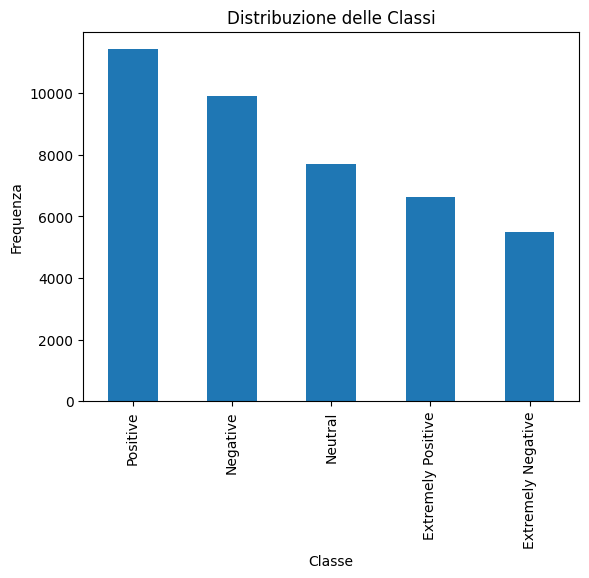

In [11]:
##Analisi di distribuzione delle classi
#

import matplotlib.pyplot as plt

sentiment = 'Sentiment'

# Calcola la distribuzione delle classi
class_distribution = df_train[sentiment].value_counts()

# Visualizza la distribuzione delle classi
print(class_distribution)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100

# Visualizza la percentuale della distribuzione delle classi
print(class_distribution_percentage)

# Grafico a barre della distribuzione delle classi
class_distribution.plot(kind='bar')
plt.title('Distribuzione delle Classi')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


https: 23979
coronavirus: 18045
prices: 7901
food: 7053
supermarket: 7018
store: 6816
grocery: 6239
people: 5537
amp: 5197
consumer: 4474


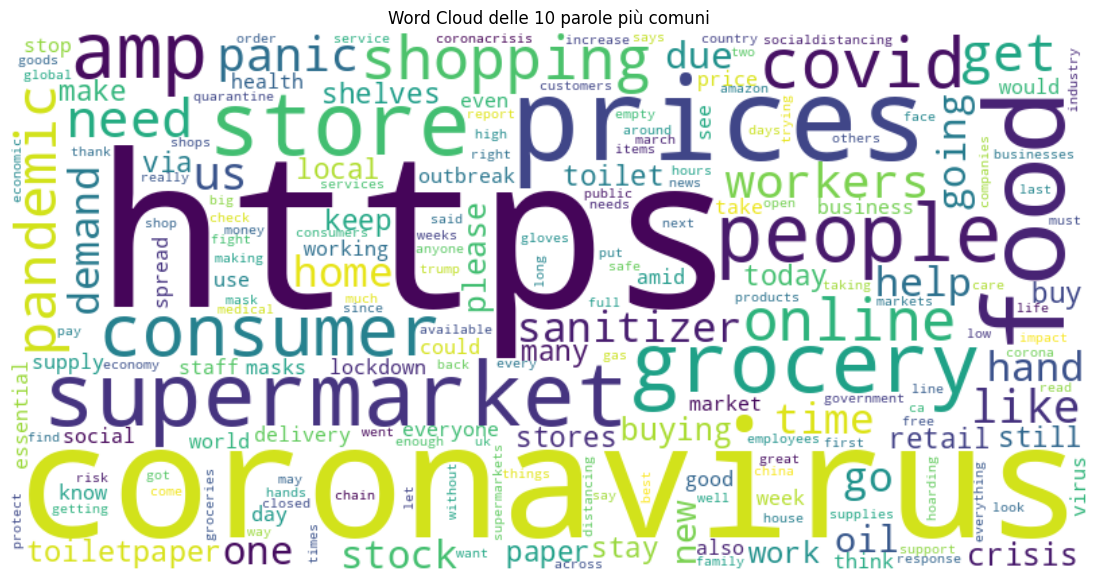

In [12]:
##Identificazione delle 10 parole più comuni
#

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Colonna che contiene il testo nel dataset
text_column = 'OriginalTweet'
text_data = df_train[text_column]

# Combina tutto il testo in un'unica stringa
combined_text = " ".join(text for text in text_data)

# Tokenizza il testo
tokens = word_tokenize(combined_text)

# Converti tutte le parole in minuscolo per standardizzare
tokens = [word.lower() for word in tokens if word.isalpha()]

# Rimuovi le stopwords (parole comuni che possono essere escluse)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Conta e ottieni le parole più comuni
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Visualizza le 10 parole più comuni
for word, count in most_common_words:
    print(f"{word}: {count}")

#WORD CLOUD (visualizzazione più gradevole)
# Importa la libreria WordCloud
from wordcloud import WordCloud

# Crea un'istanza di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Genera la word cloud dalle frequenze delle parole
wordcloud.generate_from_frequencies(word_counts)

# Visualizza la word cloud utilizzando matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud delle 10 parole più comuni')
plt.show()

In [13]:
##Text cleaning e feature extraction
#

from sklearn.feature_extraction.text import CountVectorizer
import re
from html import unescape
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# scaricare i componenti necessari di nltk
nltk.download('wordnet')
nltk.download('stopwords')

def clean_text(text):
    # Decodifica HTML
    text = unescape(text)

    # Rimuovi URL (potresti averlo già fatto in un passaggio precedente)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Rimuovi emoji (potresti averlo già fatto in un passaggio precedente)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Rimuovi numeri
    text = re.sub(r'\d+', '', text)

    # Rimuovi caratteri speciali e spazi extra
    text = re.sub(r'\s+', ' ', text)  # spazi multipli a spazio singolo
    text = re.sub(r'[^\w\s]', '', text)  # rimuove caratteri speciali, mantenendo solo parole e spazi

    # Normalizzazione del testo: converti tutto in minuscolo
    text = text.lower()

    # Tokenizzazione utilizzando solo parole (rimuove la punteggiatura)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Rimuovi le stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatizzazione
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Riunisci i token puliti in una stringa
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Applica la funzione di pulizia a ciascun elemento
cleaned_text_data = text_data.apply(clean_text)

# Feature Extraction usando CountVectorizer per ottenere la frequenza delle parole
vectorizer = CountVectorizer(max_features=1000) # Considera solo le prime 1000 parole
X = vectorizer.fit_transform(cleaned_text_data)

# Visualizza le feature estratte
print(vectorizer.get_feature_names_out())

# Converti in DataFrame per un'analisi più semplice
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['able' 'absolutely' 'access' 'according' 'account' 'across' 'act'
 'action' 'activity' 'actually' 'add' 'advantage' 'advice' 'affect'
 'affected' 'afford' 'age' 'ago' 'ahead' 'aisle' 'alcohol' 'alert' 'allow'
 'allowed' 'almost' 'along' 'already' 'also' 'always' 'amazing' 'amazon'
 'america' 'american' 'amid' 'amidst' 'among' 'amount' 'amp' 'announced'
 'another' 'answer' 'anxiety' 'anyone' 'anything' 'apart' 'app'
 'appreciate' 'april' 'area' 'arent' 'around' 'article' 'asda' 'ask'
 'asked' 'asking' 'australia' 'available' 'avoid' 'away' 'baby' 'back'
 'bad' 'bag' 'bank' 'bare' 'based' 'basic' 'bc' 'become' 'beginning'
 'behavior' 'behaviour' 'behind' 'believe' 'benefit' 'best' 'better' 'big'
 'biggest' 'bill' 'billion' 'bit' 'blog' 'book' 'borisjohnson' 'bottle'
 'bought' 'box' 'brand' 'bread' 'break' 'breaking' 'bring' 'bulk'
 'business' 'buy' 'buyer' 'buying' 'california' 'call' 'called' 'calling'
 'calm' 'came' 'canada' 'canadian' 'cannot' 'cant' 'canât' 'car' 'card'
 'care' 'car

0                         menyrbie phil_gahan chrisitv
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please dont panic enough ...
4    ready go supermarket covid outbreak im paranoi...
Name: OriginalTweet, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Columns: 1000 entries, able to youâre
dtypes: int64(1000)
memory usage: 314.0 MB
None
               able    absolutely        access     according       account  \
count  41157.000000  41157.000000  41157.000000  41157.000000  41157.000000   
mean       0.009695      0.003110      0.007654      0.004422      0.003402   
std        0.101156      0.057401      0.090970      0.066352      0.062647   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0

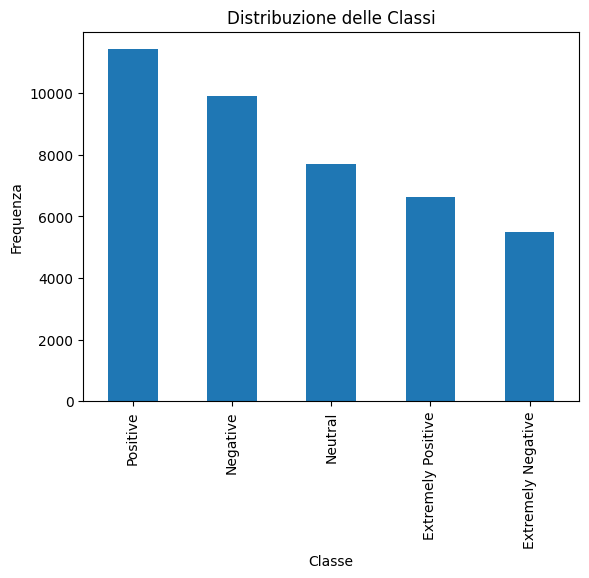

covid          18531
coronavirus    17968
price           8916
store           8137
supermarket     7707
food            7201
grocery         6731
people          5545
consumer        5131
shopping        3589
dtype: int64


In [14]:
##Esplorazione preliminare del dataset, analisi della distribuzione delle classi,
# e identificazione 10 parole più comuni per il dataset con testo pulito e
# features estratte
#

# Ottieni una panoramica del DataFrame con il testo pulito
print(cleaned_text_data.head())

# Ottieni informazioni generali sul DataFrame delle feature estratte (BoW)
print(X_df.info())

# Statistiche descrittive delle feature (frequenze delle parole)
print(X_df.describe())

# Analisi della distribuzione delle classi
class_counts = df_train[sentiment].value_counts()
print(class_counts)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100
print(class_distribution_percentage)

# Visualizza la distribuzione delle classi in un grafico a barre
class_counts.plot(kind='bar')
plt.title('Distribuzione delle Classi')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

# Somma le frequenze di ogni termine nel DataFrame delle feature
word_frequencies = X_df.sum(axis=0).sort_values(ascending=False)

# Ottieni le 10 parole più comuni
top_words = word_frequencies.head(10)
print(top_words)


count    41157.000000
mean       132.095804
std         47.888286
min          0.000000
25%         95.000000
50%        138.000000
75%        171.000000
max        263.000000
Name: tweet_length, dtype: float64
count    41157.000000
mean        17.997182
std          6.548999
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         41.000000
Name: word_count, dtype: float64


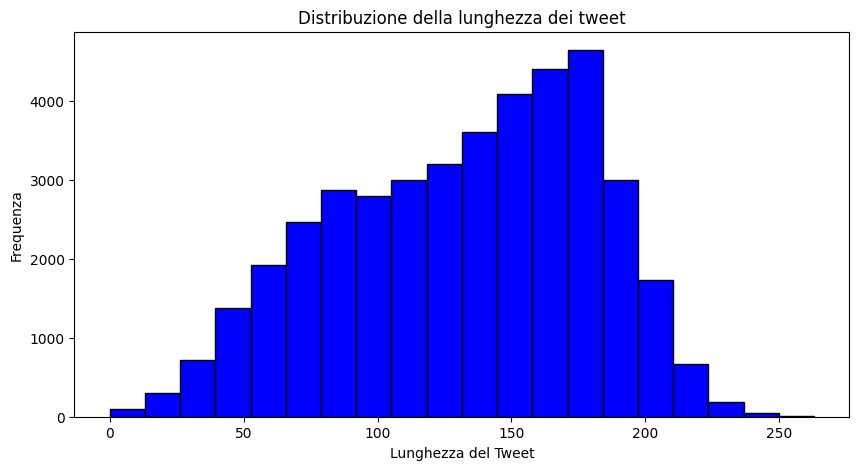

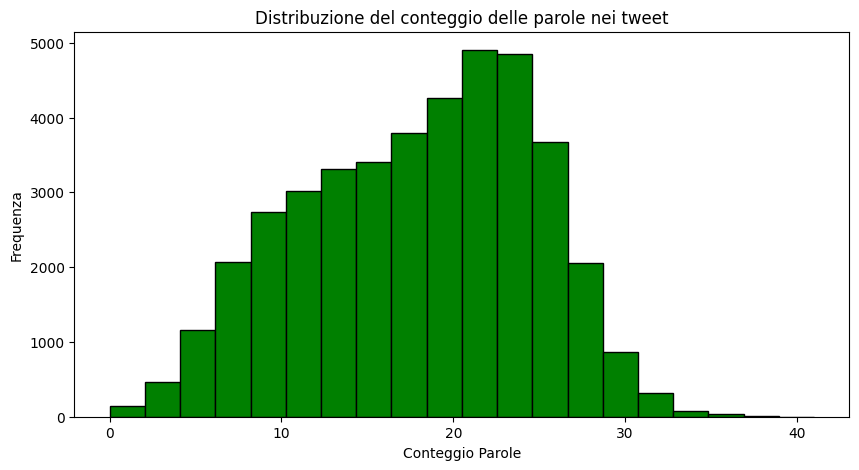

Bigrammi più comuni:
(('grocery', 'store'), 5067)
(('coronavirus', 'covid'), 2062)
(('covid', 'coronavirus'), 1760)
(('hand', 'sanitizer'), 1513)
(('online', 'shopping'), 1336)
(('toilet', 'paper'), 1230)
(('covid', 'pandemic'), 1077)
(('panic', 'buying'), 1055)
(('oil', 'price'), 1040)
(('coronavirus', 'pandemic'), 760)

Trigrammi più comuni:
(('grocery', 'store', 'worker'), 488)
(('go', 'grocery', 'store'), 302)
(('grocery', 'store', 'employee'), 278)
(('going', 'grocery', 'store'), 206)
(('local', 'grocery', 'store'), 174)
(('stop', 'panic', 'buying'), 151)
(('went', 'grocery', 'store'), 148)
(('work', 'grocery', 'store'), 127)
(('coronavirus', 'covid', 'covid'), 123)
(('food', 'supply', 'chain'), 120)


In [15]:
##Analisi statistica dei Tweets (word level)
#
import numpy as np
from nltk import bigrams, trigrams, FreqDist

# Assumendo che 'cleaned_text_data' sia una pandas Series contenente il testo dei tweet.
# Creiamo un nuovo DataFrame per le nostre analisi
analysis_df = pd.DataFrame()
analysis_df['tweet_text'] = cleaned_text_data
analysis_df['tweet_length'] = cleaned_text_data.apply(len)
analysis_df['word_count'] = cleaned_text_data.apply(lambda x: len(x.split()))

# Visualizza le statistiche descrittive per la lunghezza dei tweet e il conteggio delle parole
print(analysis_df['tweet_length'].describe())
print(analysis_df['word_count'].describe())

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['tweet_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuzione della lunghezza dei tweet')
plt.xlabel('Lunghezza del Tweet')
plt.ylabel('Frequenza')
plt.show()

# Istogramma del conteggio delle parole
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['word_count'], bins=20, color='green', edgecolor='black')
plt.title('Distribuzione del conteggio delle parole nei tweet')
plt.xlabel('Conteggio Parole')
plt.ylabel('Frequenza')
plt.show()

# Analisi di bigrammi e trigrammi (le 10 combinazioni più comuni)
# Unisco tutti i tweet in una stringa e tokenizzo
all_words = ' '.join(cleaned_text_data).split()

# Calcola bigrammi e trigrammi
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Calcola le frequenze
bi_gram_freq = FreqDist(bi_grams).most_common(10)
tri_gram_freq = FreqDist(tri_grams).most_common(10)

print("Bigrammi più comuni:")
for item in bi_gram_freq:
    print(item)

print("\nTrigrammi più comuni:")
for item in tri_gram_freq:
    print(item)

Logistic Regression Accuracy: 0.8100458441299582
Decision Tree Accuracy: 0.6319513653577835
Random Forest Accuracy: 0.6971297588200119
Confusion Matrix for Logistic Regression:
 [[3647  968]
 [ 938 4481]]


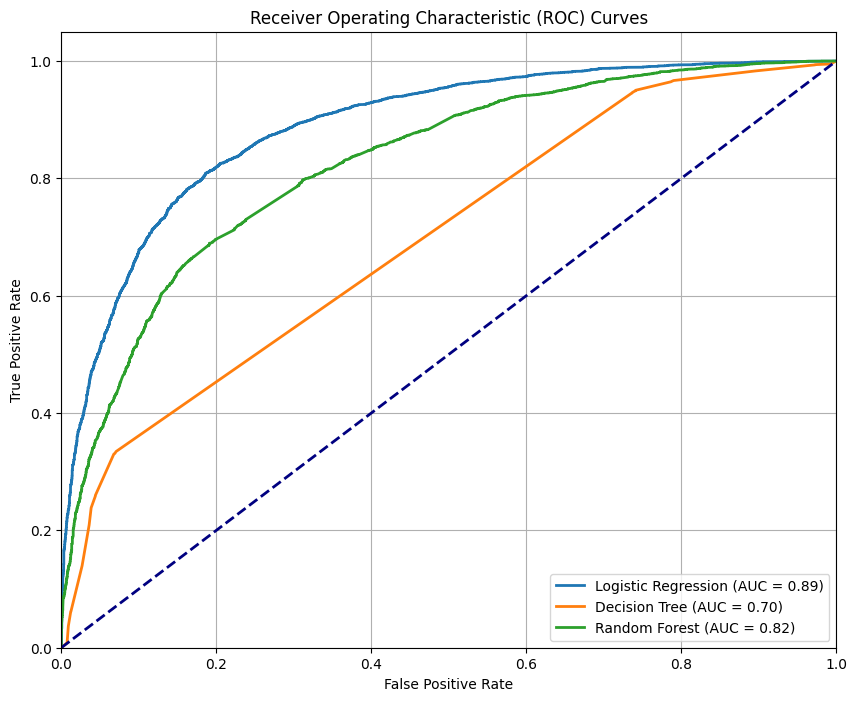

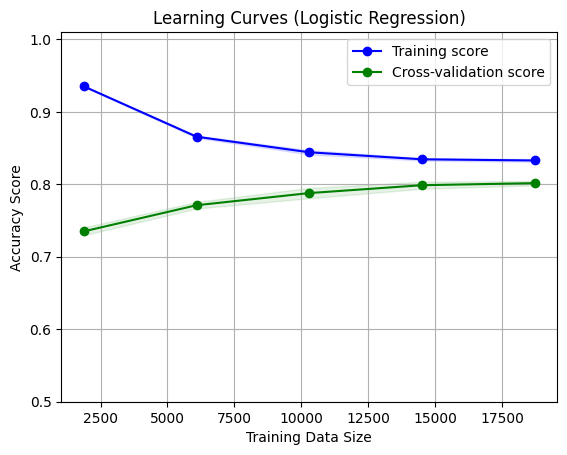

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

# 'Sentiment' è la colonna da dicotomizzare.
# Scartiamo i Tweet neutri
binary_df = df_train[df_train[sentiment] != 'Neutral']

# Definiamo le nostre feature (X) e target (y)
X = X_df.loc[binary_df.index]
y = binary_df[sentiment].apply(lambda x: 1 if x == 'Positive' or x == 'Extremely Positive' else 0)

# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inizializzazione degli algoritmi con parametri ottimizzati per velocità
logreg = LogisticRegression(solver='liblinear', random_state=42)
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

# Creazione di un dizionario per i modelli
models = {
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'Random Forest': forest
}

# Addestramento e valutazione dei modelli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')

# Visualizzazione della Matrice di Confusione per Logistic Regression
cm = confusion_matrix(y_test, logreg.predict(X_test))
print('Confusion Matrix for Logistic Regression:\n', cm)

# Visualizzazione delle Curve ROC per tutti i modelli
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Visualizzazione delle Curve di Apprendimento per Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logreg, X=X_train, y=y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.1, color='green')

plt.title('Learning Curves (Logistic Regression)')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.ylim([0.5, 1.01])
plt.grid()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Definizione dello spazio dei parametri per SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Valori comuni per il parametro di regolarizzazione C
    'gamma': [1, 0.1, 0.01, 0.001],  # Valori comuni per il parametro gamma
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Kernel comuni
}

# Creazione del modello SVM per Grid Search
svm = SVC(probability=True, random_state=42)

# Creazione dell'istanza GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Ricerca dei migliori parametri
grid_search_svm.fit(X_train, y_train)

# Stampa il miglior set di parametri trovato
print("Migliori parametri per SVM:", grid_search_svm.best_params_)

# Valutazione del miglior modello trovato con Grid Search
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {acc_svm}')

# Visualizzazione della Matrice di Confusione per SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix for SVM:\n', cm_svm)

# Visualizzazione della ROC Curve per SVM
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Fitting 5 folds for each of 64 candidates, totalling 320 fits


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definizione del modello
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compila il modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Addestramento del modello
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)

# Valutazione del modello
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Deep Learning Model Accuracy: {accuracy}')

# Visualizzazione della Loss durante l'allenamento
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predizioni per la ROC Curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

# Calcolo dell'area sotto la curva ROC
auc_keras = auc(fpr_keras, tpr_keras)

# Visualizzazione della ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Visualizzazione della Matrice di Confusione per il modello di Deep Learning
y_pred_binary = (y_pred_keras > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix for Deep Learning Model:\n', cm)